In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

C:\Users\C A I S T\AppData\Local\Temp\ipykernel_16436\4258319431.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r'\Users\C A I S T\Downloads\project\mental_disorders_reddit.csv')
print(df.shape)
df.head(500)
print(df.shape)

(701787, 5)
(701787, 5)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701787 entries, 0 to 701786
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        701741 non-null  object
 1   selftext     668096 non-null  object
 2   created_utc  701787 non-null  int64 
 3   over_18      701787 non-null  bool  
 4   subreddit    701787 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 22.1+ MB


In [4]:
# df.corr()

In [6]:
df.head()
print(df.columns)

Index(['title', 'selftext', 'created_utc', 'over_18', 'subreddit'], dtype='object')


In [ ]:
df['subreddit']

0                   BPD
1                   BPD
2                   BPD
3                   BPD
4                   BPD
              ...      
701782    mentalillness
701783    mentalillness
701784    mentalillness
701785    mentalillness
701786    mentalillness
Name: subreddit, Length: 701787, dtype: object

In [7]:
df['subreddit'].value_counts()

subreddit
BPD              241116
Anxiety          173990
depression       156972
mentalillness     53232
bipolar           51112
schizophrenia     25365
Name: count, dtype: int64

In [ ]:
# df_Corr = df.corr()

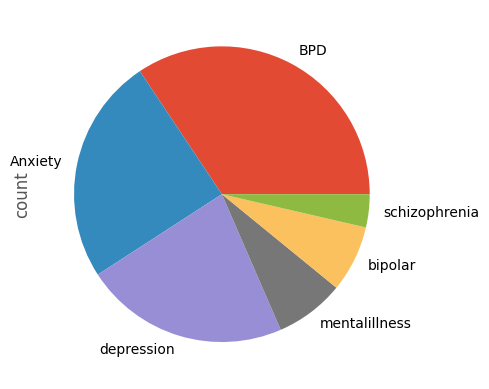

In [ ]:
# df["subreddit"].value_counts().plot.bar()
df["subreddit"].value_counts().plot.pie()
plt.show()

In [ ]:
unique_values = df['subreddit'].value_counts()
print(unique_values)

subreddit
BPD              241116
Anxiety          173990
depression       156972
mentalillness     53232
bipolar           51112
schizophrenia     25365
Name: count, dtype: int64


In [ ]:
df.columns

Index(['title', 'selftext', 'created_utc', 'over_18', 'subreddit'], dtype='object')

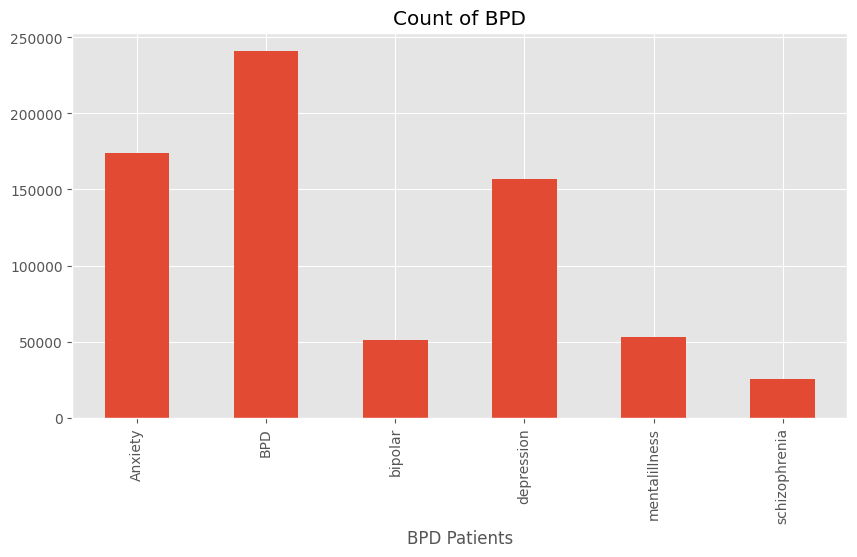

In [8]:
ax = df['subreddit'].value_counts().sort_index().plot(kind='bar',
          title='Count of BPD',
          figsize=(10, 5))
ax.set_xlabel('BPD Patients')
plt.show()

In [10]:
example = df['selftext'][50]
print(example)

DAE get mad when they see people living the lives they wish they were living? Like I get so jealous hearing that my younger sister is pregnant again. (Her current child isnt even one yet) And even though she cant care for either of them im jealous that she gets to experience it again. Like I want to have my own kid sooo bad. But it just seems like it'll never happen. So then i het depressed and start spiraling again. I know i cant control other peoples actions but i cant help it.


In [11]:
import nltk
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to C:\Users\C A I S
[nltk_data]     T\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['DAE',
 'get',
 'mad',
 'when',
 'they',
 'see',
 'people',
 'living',
 'the',
 'lives']

In [12]:
import nltk
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\C A I S T\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('DAE', 'NNP'),
 ('get', 'VBP'),
 ('mad', 'JJ'),
 ('when', 'WRB'),
 ('they', 'PRP'),
 ('see', 'VBP'),
 ('people', 'NNS'),
 ('living', 'VBG'),
 ('the', 'DT'),
 ('lives', 'NNS')]

In [13]:
nltk.download('words')
nltk.download('maxent_ne_chunker')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()
# entities.draw()
print(str(entities))

[nltk_data] Downloading package words to C:\Users\C A I S
[nltk_data]     T\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\C A I S
[nltk_data]     T\AppData\Roaming\nltk_data...


(S
  DAE/NNP
  get/VBP
  mad/JJ
  when/WRB
  they/PRP
  see/VBP
  people/NNS
  living/VBG
  the/DT
  lives/NNS
  they/PRP
  wish/VBP
  they/PRP
  were/VBD
  living/VBG
  ?/.
  Like/IN
  I/PRP
  get/VBP
  so/RB
  jealous/JJ
  hearing/NN
  that/IN
  my/PRP$
  younger/JJR
  sister/NN
  is/VBZ
  pregnant/JJ
  again/RB
  ./.
  (/(
  Her/PRP$
  current/JJ
  child/NN
  isnt/NN
  even/RB
  one/CD
  yet/RB
  )/)
  And/CC
  even/RB
  though/IN
  she/PRP
  cant/VBZ
  care/NN
  for/IN
  either/DT
  of/IN
  them/PRP
  im/VBP
  jealous/JJ
  that/IN
  she/PRP
  gets/VBZ
  to/TO
  experience/VB
  it/PRP
  again/RB
  ./.
  Like/IN
  I/PRP
  want/VBP
  to/TO
  have/VB
  my/PRP$
  own/JJ
  kid/NN
  sooo/NN
  bad/JJ
  ./.
  But/CC
  it/PRP
  just/RB
  seems/VBZ
  like/IN
  it/PRP
  'll/MD
  never/RB
  happen/VB
  ./.
  So/IN
  then/RB
  i/VB
  het/NN
  depressed/VBN
  and/CC
  start/VB
  spiraling/VBG
  again/RB
  ./.
  I/PRP
  know/VBP
  i/JJ
  cant/VBP
  control/NN
  other/JJ
  peoples/NNS
  actions/NNS

[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
import nltk
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
scores = sia.polarity_scores('This is the worst thing ever.')
print(scores)


[nltk_data] Downloading package vader_lexicon to C:\Users\C A I S
[nltk_data]     T\AppData\Roaming\nltk_data...


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}


In [15]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.175, 'neu': 0.731, 'pos': 0.094, 'compound': -0.8569}

In [ ]:
from tqdm import tqdm
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['selftext']
    if isinstance(text, str):
        res[i] = sia.polarity_scores(text)
    else:
        res[i] = None


100%|██████████| 701787/701787 [20:51<00:00, 560.69it/s]


In [17]:
vaders = pd.DataFrame(df)
vaders['title'] = vaders['title'].astype(str)
df['selftext'] = df['selftext'].astype(str)
merged_df = vaders.merge(df, left_on='title', right_on='selftext', how='left')


In [18]:
vaders.head()

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.models import save_model
from keras.optimizers import Adam

# Load your dataset from a CSV file
df = pd.read_csv(r'\Users\C A I S T\Downloads\project\mental_disorders_reddit.csv')

# Display basic information about the dataset
print(df.shape)
print(df.info())
print(df['subreddit'].value_counts())

# Extract features and labels
X = df['selftext'].astype(str)  # Text data
y = df['subreddit']  # Labels

# Encode string labels to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert labels to categorical one-hot encoding
num_classes = len(np.unique(y_encoded))
y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Define your model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_tfidf.shape[1]))  # Use the number of TF-IDF features
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Save the model
save_model(model, 'C:\\Users\\C A I S T\\Downloads\\project\\BPD_Sentinal.h5')


# Optionally, save the label encoder and TF-IDF vectorizer for later use
import joblib
joblib.dump(label_encoder, '/content/drive/MyDrive/label_encoder.pkl')
joblib.dump(vectorizer, '/content/drive/MyDrive/tfidf_vectorizer.pkl')


(701787, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701787 entries, 0 to 701786
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        701741 non-null  object
 1   selftext     668096 non-null  object
 2   created_utc  701787 non-null  int64 
 3   over_18      701787 non-null  bool  
 4   subreddit    701787 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 22.1+ MB
None
subreddit
BPD              241116
Anxiety          173990
depression       156972
mentalillness     53232
bipolar           51112
schizophrenia     25365
Name: count, dtype: int64


c:\Users\C A I S T\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17545/17545 ━━━━━━━━━━━━━━━━━━━━ 13s 706us/step - accuracy: 0.6300 - loss: 1.0066 - val_accuracy: 0.6584 - val_loss: 0.9197
Epoch 2/10
17545/17545 ━━━━━━━━━━━━━━━━━━━━ 12s 685us/step - accuracy: 0.6641 - loss: 0.9081 - val_accuracy: 0.6637 - val_loss: 0.9079
Epoch 3/10
17545/17545 ━━━━━━━━━━━━━━━━━━━━ 12s 676us/step - accuracy: 0.6716 - loss: 0.8902 - val_accuracy: 0.6656 - val_loss: 0.9061
Epoch 4/10
17545/17545 ━━━━━━━━━━━━━━━━━━━━ 12s 669us/step - accuracy: 0.6761 - loss: 0.8793 - val_accuracy: 0.6653 - val_loss: 0.9036
Epoch 5/10
17545/17545 ━━━━━━━━━━━━━━━━━━━━ 12s 676us/step - accuracy: 0.6809 - loss: 0.8680 - val_accuracy: 0.6643 - val_loss: 0.9070
Epoch 6/10
17545/17545 ━━━━━━━━━━━━━━━━━━━━ 12s 674us/step - accuracy: 0.6821 - loss: 0.8623 - val_accuracy: 0.6638 - val_loss: 0.9078
Epoch 7/10
17545/17545 ━━━━━━━━━━━━━━━━━━━━ 12s 670us/step - accuracy: 0.6846 - loss: 0.8559 - val_accuracy: 0.6634 - val_loss: 0.9114
Epoch 8/10
17545/17545 ━━━━━━━━━━━━━━━━━━━━ 12s 667us/s

['/content/drive/MyDrive/tfidf_vectorizer.pkl']

In [ ]:
from keras.models import load_model

# Load the model
model = load_model('BPD Sentinal.keras')